In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
cwd=os.getcwd()
cwd

'/Users/ankitjaiswal'

In [6]:
dataset_train=pd.read_csv('/Users/ankitjaiswal/Downloads/Google_Stock_Price_Train.csv')
dataset_train.head()
training_set=dataset_train.iloc[:,1:2].values


In [8]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [10]:
#creating a data structure with 60 timesteps and 1 output

X_train=[]
y_train=[]
for i in range(60,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [12]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [23]:
#Initailising the RNN
regressor=Sequential()

In [25]:
#adding first LSTM layer and some Dropout regulation
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [26]:
#adding second LSTM layer and some Dropout regulation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [27]:
#adding third LSTM layer and some Dropout regulation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [28]:
#adding third LSTM layer and some Dropout regulation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [29]:
#adding output layer
regressor.add(Dense(units=1))

In [30]:
#compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [31]:
#Fitting the RNN to the Training set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 10s 100ms/step - loss: 0.0324
Epoch 2/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0052
Epoch 11/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0046
Epoch 13/100

38/38 [==============================] - 4s 104ms/step - loss: 0.0017
Epoch 100/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0015


In [32]:
#getting real stock prices
dataset_test=pd.read_csv('/Users/ankitjaiswal/Downloads/Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values

In [35]:
#getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

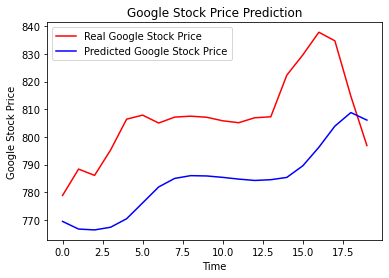

In [36]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
